## Tensor Calculus and PDE Plots

In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


1. Range of x, y, z
2. Generate a list of values for all combinations of x, y, z (meshgrid)
3. Generate the size of the matrix and formulate an empty array, f
4. Compute the function from the meshgrid and fill in array, f
5. Generate solution matrix
6. Compute the final solution of the function required
7. Plot if needed

### Task A1: Find the div of a function within limits (for three variables)

\begin{equation}
f(x, y, z) = 3x^2 + e^y + xy
\end{equation}

In [2]:
x = np.arange(-2,2,0.01) #x = y = z

#generates a list of values for all combinations of x, y, z
(Xg, Yg, Zg) = np.meshgrid(x, x, x)

In [3]:
# size of the matrix and formulation of array f
S = Xg.shape
f = np.ndarray((S[0],S[1],S[2]))

In [4]:
# compute function
f = 3*Xg**2 + np.exp(Yg) + Zg*Yg

In [5]:
# generate the matrix after divergence (one row, column and layer less due to differentiation)
divf = np.ndarray((S[0]-1,S[1]-1,S[2]-1))

In [6]:
#compute the divergence (fwd scheme)
# divf = df/dx + df/dy + df/dz, f[y, x, z] = f[y = column, x = row, z = layer]
divf = (f[:-1,1:,:-1]-f[:-1,:-1,:-1])/(Xg[:-1,1:,:-1]-Xg[:-1,:-1,:-1]) + \
       (f[1:,:-1,:-1]-f[:-1,:-1,:-1])/(Yg[1:,:-1,:-1]-Yg[:-1,:-1,:-1]) + \
       (f[:-1,1:,1:]-f[:-1,:-1,:-1])/(Zg[:-1,:-1,1:]-Zg[:-1,:-1,:-1])

In [7]:
#compute the error through finding comparison with analytical answer
divfa = np.ndarray((S[0],S[1],S[2]))
divfa = 6*Xg + np.exp(Yg) + Zg + Yg

error = np.max(divf - divfa[:-1,:-1,:-1])

### Task A2: Find the curl of a function within limits (three variables)

In [8]:
x = np.arange(-2,2,0.01) #x = y = z

#generates a list of values for all combinations of x, y, z
(Xg, Yg, Zg) = np.meshgrid(x, x, x)

In [9]:
# size of the matrix and formulation of array f
S = Xg.shape
f = np.ndarray((S[0],S[1],S[2], 3))

In [10]:
# compute function
f[:,:,:,0] = 3*Xg**2 #f1
f[:,:,:,1] = np.exp(Yg) #f2
f[:,:,:,2] = Zg*Yg #f3

In [11]:
# allocate array for curlf
curlf = np.ndarray((S[0]-1,S[1]-1,S[2]-1,3))

In [12]:
# i component = df3/dy - df2/dz
curlf[:,:,:,0] = (f[1:,:-1,:-1,2]-f[:-1,:-1,:-1,2])/(Yg[1:,:-1,:-1]-Yg[:-1,:-1,:-1]) - \
                 (f[:-1,:-1,1:,1]-f[:-1,:-1,:-1,1])/(Zg[:-1,:-1,1:]-Zg[:-1,:-1,:-1])

In [13]:
# j component = df1/dz - df3/dx
curlf[:,:,:,1] = (f[:-1,:-1,1:,0]-f[:-1,:-1,:-1,0])/(Zg[:-1,:-1,1:]-Zg[:-1,:-1,:-1]) - \
                 (f[:-1,1:,:-1,2]-f[:-1,:-1,:-1,2])/(Xg[:-1,1:,:-1]-Xg[:-1,:-1,:-1])

In [14]:
# k component = df2/dx - df1/dy
curlf[:,:,:,2] = (f[:-1,1:,:-1,1]-f[:-1,:-1,:-1,1])/(Xg[:-1,1:,:-1]-Xg[:-1,:-1,:-1]) - \
                 (f[1:,:-1,:-1,0]-f[:-1,:-1,:-1,0])/(Yg[1:,:-1,:-1]-Yg[:-1,:-1,:-1])

In [15]:
# analytical solution
print(curlf[:,:,:,0])
print(curlf[:,:,:,1])
print(curlf[:,:,:,2])

[[[-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  ...
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]]

 [[-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  ...
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]]

 [[-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  ...
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]]

 ...

 [[-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.98]
  ...
  [-2.   -1.99 -1.98 ...  1.96  1.97  1.

### Task B: Validation of the 2D Laplace equation

In [16]:
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d

In [17]:
x = np.arange(0,2,0.001) #x = y = z

#generates a list of values for all combinations of x, y, z
(Xg, Yg) = np.meshgrid(x, x)

In [18]:
# size of the matrix and formulation of array f
S = Xg.shape
f = np.ndarray((S[0],S[1]))

In [19]:
# compute function
f = Xg**2 + Yg**2

In [20]:
# first derivative solution matrix
dfdx = np.ndarray((S[0]-1,S[1]-1))
dfdy = np.ndarray((S[0]-1,S[1]-1))

In [21]:
# compute first derivative
dfdx = (f[:-1,1:] - f[:-1,:-1]) / (Xg[:-1,1:] - Xg[:-1,:-1])
dfdy = (f[1:,:-1] - f[:-1,:-1]) / (Yg[1:,:-1] - Yg[:-1,:-1])

In [22]:
# second derivative solution matrix
df2dx2 = np.ndarray((S[0]-2,S[1]-2))
df2dy2 = np.ndarray((S[0]-2,S[1]-2))

In [23]:
# compute second derivative
df2dx2 = (dfdx[:-1,1:] - dfdx[:-1,:-1]) / (Xg[:-2,1:-1] - Xg[:-2,:-2])
df2dy2 = (dfdy[1:,:-1] - dfdy[:-1,:-1]) / (Yg[1:-1,:-2] - Yg[:-2,:-2])

In [24]:
# compute Laplacian from first and second derivatives
Lap = np.ndarray((S[0]-2,S[1]-2))
Lap = df2dx2 + df2dy2
print(Lap)

[[4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 ...
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]]


### Task C: Plot of PDE solutions in Cartesian Coordinates

In [25]:
# define x range
x = np.arange(0, 2, 0.1)

#define y range
y = np.arange(0, 4, 0.1)

# combinations of x and y values through meshgrid
(Xg, Yg) = np.meshgrid(x, y)

In [26]:
# size of grid
S = Xg.shape

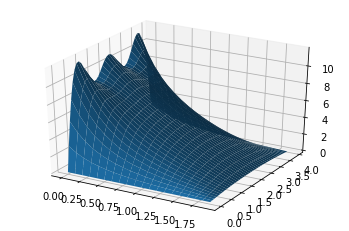

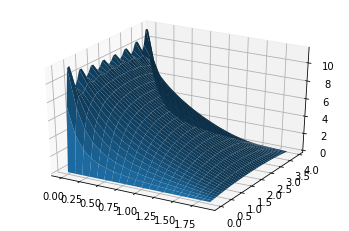

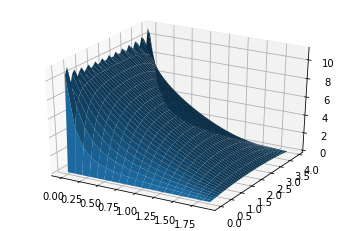

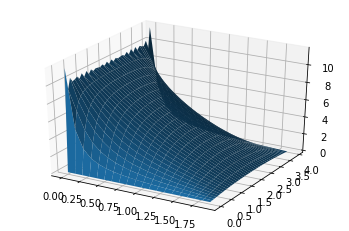

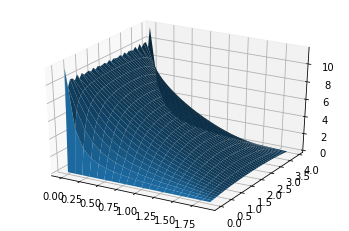

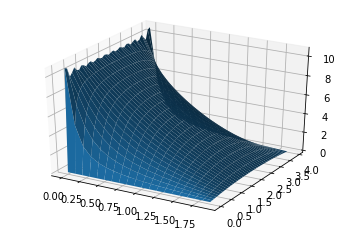

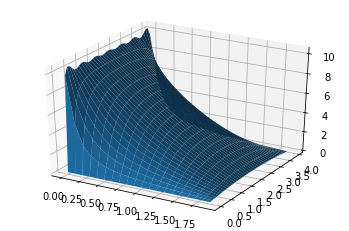

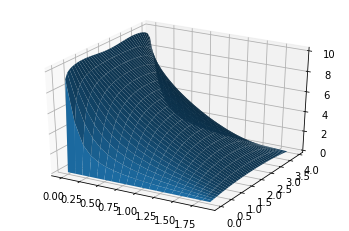

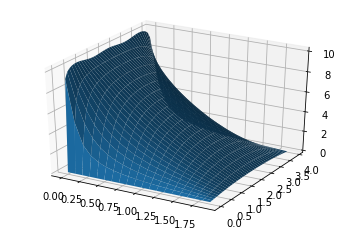

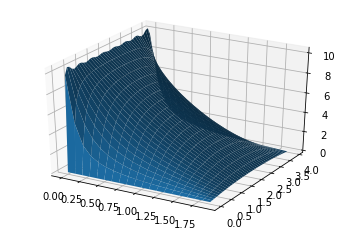

In [27]:
# summation loop
for N in range(5, 105, 10):
    
    # initialise empty array for function, f
    f = np.zeros((S[0], S[1]))
    for n in range(1, N+1, 2):
        f += 40/pi*(np.sinh(n*pi/4*(Xg-2)))/(n*np.sinh(-n*pi/2))*np.sin(n*pi*Yg/4)
    
    # plot the result with these N terms
    ax = plt.axes(projection='3d')
    ax.plot_surface(Xg,Yg,f)
    plt.show()

### Task D: Plot of PDE Solutions in Cylindrical Polar Coordinates

In [28]:
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d

In [29]:
# define pi
pi = np.pi

# define radius
a = 1
#define T0
T0 = 50

In [30]:
# define x range
r = np.arange(0, a, 0.1)

#define y range
th = np.arange(0, pi, 0.1)

# combinations of x and y values through meshgrid
(Rg, Thg) = np.meshgrid(r, th)

# transform from polar to cartesian for plotting purposes
(Xg,Yg) = (Rg*np.cos(Rg),Rg*np.sin(Thg))

In [31]:
# size of grid
S = Rg.shape

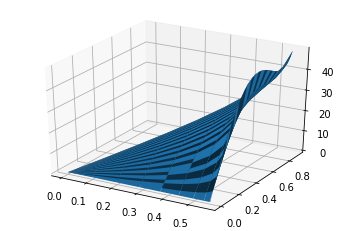

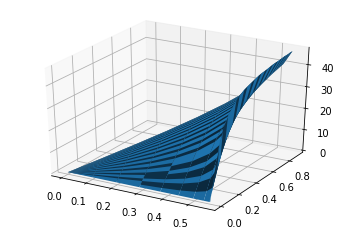

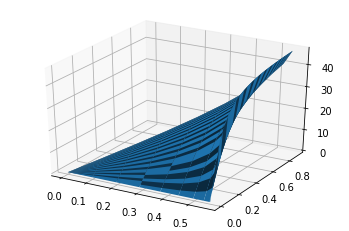

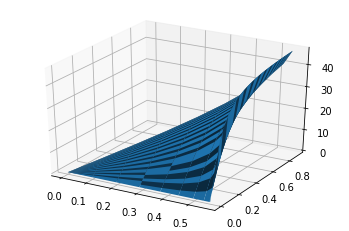

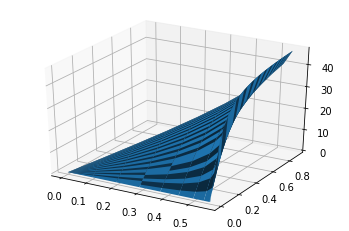

In [32]:
# summation loop
for N in range(5, 105, 20):
    
    # initialise empty array for function, f
    f = np.zeros((S[0], S[1]))
    for n in range(1, N+1, 2): # odd = spacing of 2
        f += 4*T0/pi*((Rg/a)**n)/n * np.sin(n*Thg)
    # plot the result with these N terms
    ax = plt.axes(projection='3d')
    ax.plot_surface(Xg,Yg,f)
    plt.show()